# Análise do Fluxo de Caixa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
    caminho_arquivos = '../dados/cvm'
    # Carregar DFC
    dfc = pd.read_csv(f'{caminho_arquivos}/DFC_MI.csv', sep=';', encoding='ISO-8859-1', decimal=',')


In [9]:
dfc_op_invest_fin =  dfc[(dfc['CNPJ_CIA'] == '33.041.260/0652-90') & 
            (pd.to_datetime(dfc['DT_REFER']).dt.month == 12) &
            (pd.to_datetime(dfc['DT_REFER']).dt.year == 2020) &
            ((dfc['CD_CONTA'] == '6.01') |
            (dfc['CD_CONTA'] == '6.02') |
            (dfc['CD_CONTA'] == '6.03'))]
dfc_op_invest_fin

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
587167,33.041.260/0652-90,2020-12-31,1,VIA S.A.,6505,DF Consolidado - Demonstração do Fluxo de Caix...,REAL,MIL,ÚLTIMO,2020-01-01,2020-12-31,6.01,Caixa Líquido Atividades Operacionais,-4221000.0,S
587206,33.041.260/0652-90,2020-12-31,1,VIA S.A.,6505,DF Consolidado - Demonstração do Fluxo de Caix...,REAL,MIL,ÚLTIMO,2020-01-01,2020-12-31,6.02,Caixa Líquido Atividades de Investimento,-444000.0,S
587214,33.041.260/0652-90,2020-12-31,1,VIA S.A.,6505,DF Consolidado - Demonstração do Fluxo de Caix...,REAL,MIL,ÚLTIMO,2020-01-01,2020-12-31,6.03,Caixa Líquido Atividades de Financiamento,6285000.0,S


In [83]:
list_fc = []

for ano in range(2011,2021):
    for mes in range(3,15,3):
        dfc_resultado =  dfc[(dfc['CNPJ_CIA'] == '33.041.260/0652-90') & 
            (pd.to_datetime(dfc['DT_REFER']).dt.month == mes) &
            (pd.to_datetime(dfc['DT_REFER']).dt.year == ano) &
            (dfc['CD_CONTA'].str.contains('6.05.0'))]
        # display(dfc_resultado.iloc[0]['DT_REFER'])
        list_fc.append({'data':dfc_resultado.iloc[0]['DT_REFER'],
                    'fluxo_caixa':dfc_resultado.iloc[1]['VL_CONTA'] - dfc_resultado.iloc[0]['VL_CONTA']})

# Criar DataFrame com Saldo do Fluxo de Caixa por Semestre para a empresas selecionada
df_fc = pd.DataFrame(list_fc)

<AxesSubplot:xlabel='data', ylabel='fluxo_caixa'>

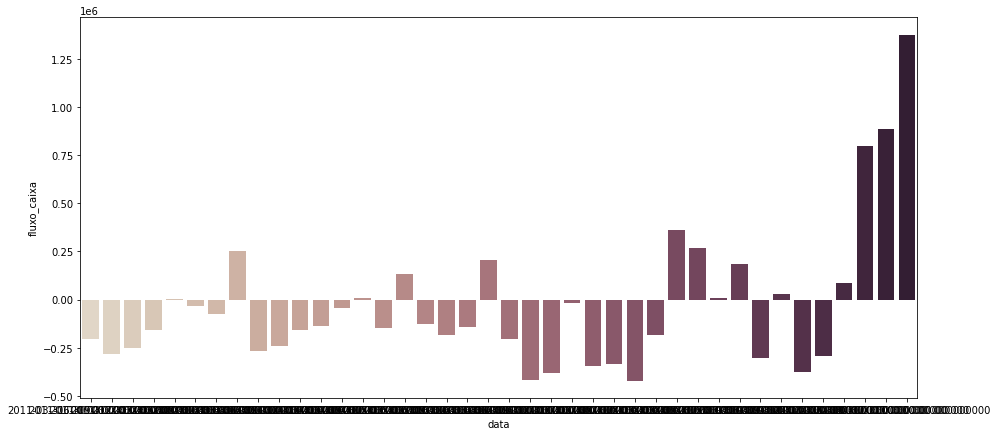

In [82]:
df_fc['data'] = pd.to_datetime(df_fc['data'])
# df_fc['ano'] = df_fc['data'].dt.year
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x="data",y="fluxo_caixa", palette="ch:.25", data=df_fc)

<AxesSubplot:xlabel='data', ylabel='fluxo_caixa'>

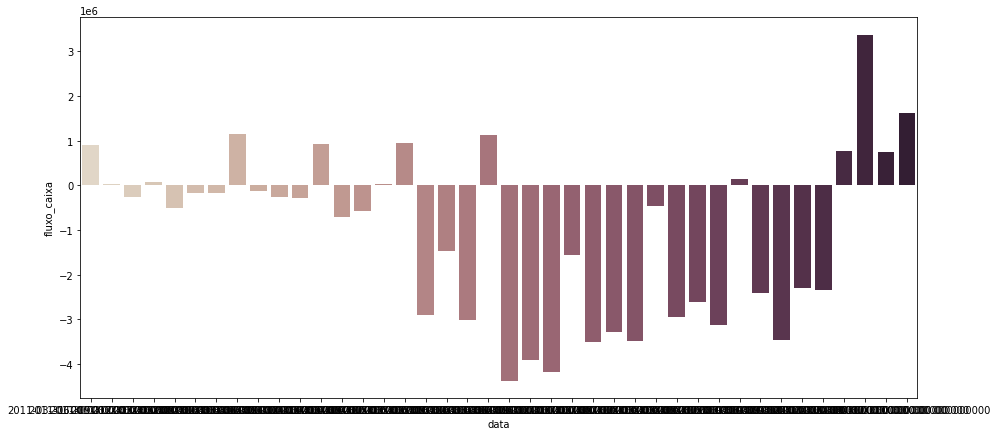

In [84]:
df_fc['data'] = pd.to_datetime(df_fc['data'])
# df_fc['ano'] = df_fc['data'].dt.year
f, ax = plt.subplots(figsize=(15, 7))
sns.barplot(x="data",y="fluxo_caixa", palette="ch:.25", data=df_fc)

In [ ]:
dfc_op_invest_fin =  dfc[(dfc['CNPJ_CIA'] == '33.041.260/0652-90') & 
            (pd.to_datetime(dfc['DT_REFER']).dt.month == 12) &
            (pd.to_datetime(dfc['DT_REFER']).dt.year == 2020) &
            ((dfc['CD_CONTA'] == '6.01') |
            (dfc['CD_CONTA'] == '6.02') |
            (dfc['CD_CONTA'] == '6.03'))]
dfc_op_invest_fin